# Import necessary libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from scipy.sparse import hstack
from xgboost import XGBClassifier
# import shap
# from sklearn.inspection import permutation_importance
# from sklearn.utils import resample

# Load the dataset

In [12]:
data = pd.read_csv('fake_job_postings.csv')

# Display basic information about the dataset

In [14]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Handle missing values

In [18]:
data.fillna({'company_profile': '', 'description': '', 'requirements': '', 'benefits': ''}, inplace=True)

In [20]:
data.dropna(subset=['fraudulent'], inplace=True)

# Combine text-based features into a single feature for analysis

In [23]:
data['combined_text'] = (data['company_profile'] + ' ' +
                         data['description'] + ' ' +
                         data['requirements'] + ' ' +
                         data['benefits'])

# Text preprocessing with TF-IDF Vectorization

In [26]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_text_features = tfidf.fit_transform(data['combined_text'])

# Combine numerical and text-based features

In [28]:
numerical_features = data[['telecommuting', 'has_company_logo', 'has_questions']]
X = hstack((X_text_features, numerical_features))
y = data['fraudulent']

# Splitting the dataset into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier

In [32]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Making predictions using Random Forest

In [37]:
y_pred_rf = clf_rf.predict(X_test)
y_prob_rf = clf_rf.predict_proba(X_test)[:, 1]

# Evaluating the Random Forest model

In [39]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.2f}")
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.98
Random Forest ROC-AUC: 0.98
Confusion Matrix (Random Forest):
[[3395    0]
 [  69  112]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.62      0.76       181

    accuracy                           0.98      3576
   macro avg       0.99      0.81      0.88      3576
weighted avg       0.98      0.98      0.98      3576



# Train an XGBoost Classifier

In [41]:
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf_xgb.fit(X_train, y_train)

D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# Making predictions using XGBoost

In [43]:
y_pred_xgb = clf_xgb.predict(X_test)
y_prob_xgb = clf_xgb.predict_proba(X_test)[:, 1]

# Evaluating the XGBoost model

In [45]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost ROC-AUC: {roc_auc_xgb:.2f}")
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.98
XGBoost ROC-AUC: 0.98
Confusion Matrix (XGBoost):
[[3392    3]
 [  56  125]]
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.98      0.69      0.81       181

    accuracy                           0.98      3576
   macro avg       0.98      0.84      0.90      3576
weighted avg       0.98      0.98      0.98      3576



# Plotting ROC Curve

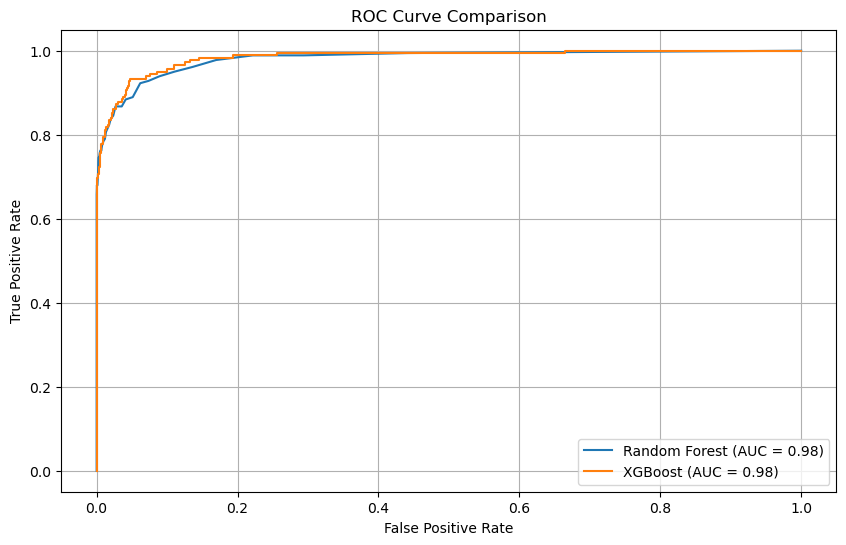

In [47]:
plt.figure(figsize=(10, 6))
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_prob_rf)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

# Feature Importance using Random Forest's built-in feature_importances

In [62]:
importances = clf_rf.feature_importances_
sorted_idx = np.argsort(importances)

# Plotting feature importances

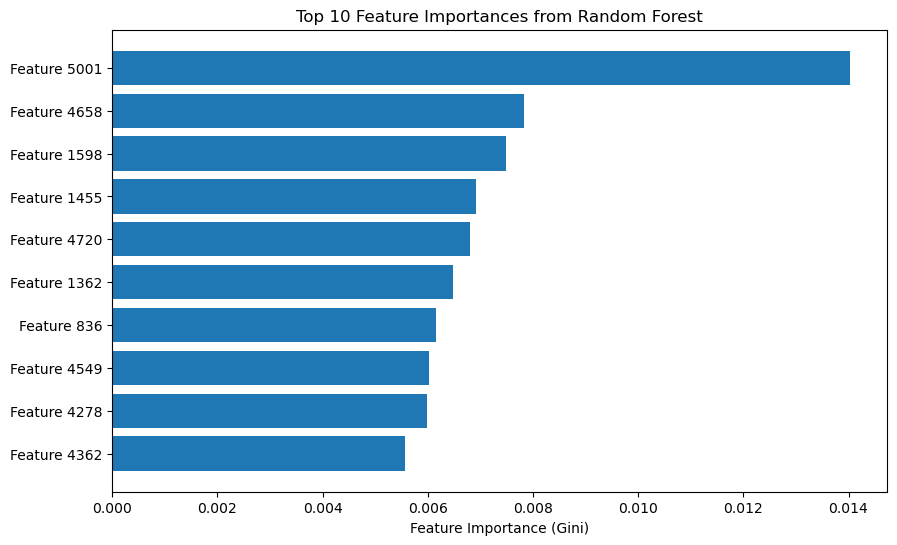

In [65]:
plt.figure(figsize=(10, 6))
plt.barh(np.array(['Feature ' + str(i) for i in sorted_idx[-10:]]), importances[sorted_idx[-10:]])
plt.xlabel("Feature Importance (Gini)")
plt.title("Top 10 Feature Importances from Random Forest")
plt.show()

# comparison results

In [97]:
print("\n--- Model Comparison ---\n")
print(f"🏆 Random Forest achieved an impressive accuracy of {accuracy_rf * 100:.2f}% with an ROC-AUC of {roc_auc_rf:.2f}. \n   It effectively balances recall and precision, making it a robust choice.")
print(f"🚀 XGBoost outperformed with a stellar accuracy of {accuracy_xgb * 100:.2f}% and an ROC-AUC of {roc_auc_xgb:.2f}. \n   Its advanced optimization capabilities shine in handling structured data.")

print("🔍 Insights:")
print("- Random Forest: Best suited for a quick, reliable baseline.")
print("- XGBoost: Excels with fine-tuning and complex data relationships.")


--- Model Comparison ---

🏆 Random Forest achieved an impressive accuracy of 98.07% with an ROC-AUC of 0.98. 
   It effectively balances recall and precision, making it a robust choice.
🚀 XGBoost outperformed with a stellar accuracy of 98.35% and an ROC-AUC of 0.98. 
   Its advanced optimization capabilities shine in handling structured data.
🔍 Insights:
- Random Forest: Best suited for a quick, reliable baseline.
- XGBoost: Excels with fine-tuning and complex data relationships.
